#📌 Extracción

In [89]:
import pandas as pd
import json

# Datos cargados desde el archivo JSON
# Este paso simula la carga desde una API, como se solicitó.
data = [{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Monthly":59.9,"Total":"542.4"}}}]  # Datos representativos del archivo original

# Convertir la estructura JSON a un DataFrame de Pandas
df = pd.json_normalize(data)

# Mostrar el DataFrame resultante
print("DataFrame resultante:")
print(df.to_markdown(index=False, numalign="left", stralign="left"))

DataFrame resultante:
| customerID   | Churn   | customer.gender   | customer.SeniorCitizen   | customer.Partner   | customer.Dependents   | customer.tenure   | phone.PhoneService   | phone.MultipleLines   | internet.InternetService   | internet.OnlineSecurity   | internet.OnlineBackup   | internet.DeviceProtection   | internet.TechSupport   | internet.StreamingTV   | internet.StreamingMovies   | account.Contract   | account.PaperlessBilling   | account.PaymentMethod   | account.Charges.Monthly   | account.Charges.Total   |
|:-------------|:--------|:------------------|:-------------------------|:-------------------|:----------------------|:------------------|:---------------------|:----------------------|:---------------------------|:--------------------------|:------------------------|:----------------------------|:-----------------------|:-----------------------|:---------------------------|:-------------------|:---------------------------|:------------------------|:----------------

#🔧 Transformación

In [90]:
# Muestra las primeras 5 filas para una vista rápida de los datos.
print("Primeras 5 filas del DataFrame:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Muestra el nombre de las columnas y sus tipos de datos.
print("\nInformación de las columnas y tipos de datos:")
df.info()

Primeras 5 filas del DataFrame:
| customerID   | Churn   | customer.gender   | customer.SeniorCitizen   | customer.Partner   | customer.Dependents   | customer.tenure   | phone.PhoneService   | phone.MultipleLines   | internet.InternetService   | internet.OnlineSecurity   | internet.OnlineBackup   | internet.DeviceProtection   | internet.TechSupport   | internet.StreamingTV   | internet.StreamingMovies   | account.Contract   | account.PaperlessBilling   | account.PaymentMethod   | account.Charges.Monthly   | account.Charges.Total   |
|:-------------|:--------|:------------------|:-------------------------|:-------------------|:----------------------|:------------------|:---------------------|:----------------------|:---------------------------|:--------------------------|:------------------------|:----------------------------|:-----------------------|:-----------------------|:---------------------------|:-------------------|:---------------------------|:------------------------|:------

In [91]:
# Verificación de valores nulos en todo el DataFrame
print("Valores nulos por columna (antes de la limpieza):")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Valores nulos por columna (antes de la limpieza):
|                           | 0   |
|:--------------------------|:----|
| customerID                | 0   |
| Churn                     | 0   |
| customer.gender           | 0   |
| customer.SeniorCitizen    | 0   |
| customer.Partner          | 0   |
| customer.Dependents       | 0   |
| customer.tenure           | 0   |
| phone.PhoneService        | 0   |
| phone.MultipleLines       | 0   |
| internet.InternetService  | 0   |
| internet.OnlineSecurity   | 0   |
| internet.OnlineBackup     | 0   |
| internet.DeviceProtection | 0   |
| internet.TechSupport      | 0   |
| internet.StreamingTV      | 0   |
| internet.StreamingMovies  | 0   |
| account.Contract          | 0   |
| account.PaperlessBilling  | 0   |
| account.PaymentMethod     | 0   |
| account.Charges.Monthly   | 0   |
| account.Charges.Total     | 0   |


In [92]:
import numpy as np

# Reemplaza los espacios en blanco de la columna `account.Charges.Total` con `NaN`
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

# Convierte la columna a tipo numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'])

# Rellena los valores nulos con la media de la columna
mean_charges_total = df['account.Charges.Total'].mean()
df['account.Charges.Total'].fillna(mean_charges_total, inplace=True)

# Verificación de que la columna ya no tiene nulos y es numérica
print("\nInformación del DataFrame después de la limpieza de Total Charges:")
df.info()
print("\nValores nulos por columna (después de la limpieza):")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))


Información del DataFrame después de la limpieza de Total Charges:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 2 non-null      object 
 1   Churn                      2 non-null      object 
 2   customer.gender            2 non-null      object 
 3   customer.SeniorCitizen     2 non-null      int64  
 4   customer.Partner           2 non-null      object 
 5   customer.Dependents        2 non-null      object 
 6   customer.tenure            2 non-null      int64  
 7   phone.PhoneService         2 non-null      object 
 8   phone.MultipleLines        2 non-null      object 
 9   internet.InternetService   2 non-null      object 
 10  internet.OnlineSecurity    2 non-null      object 
 11  internet.OnlineBackup      2 non-null      object 
 12  internet.DeviceProtection  2 non-null     

/tmp/ipython-input-4067823240.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(mean_charges_total, inplace=True)


In [93]:
# Mapea la columna 'Churn' a valores binarios: No=0, Yes=1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Mapea la columna 'customer.SeniorCitizen' a valores binarios: 0=No, 1=Yes
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Muestra los cambios en las primeras filas
print("\nDataFrame con variables mapeadas (primeras 5 filas):")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


DataFrame con variables mapeadas (primeras 5 filas):
| customerID   | Churn   | customer.gender   | customer.SeniorCitizen   | customer.Partner   | customer.Dependents   | customer.tenure   | phone.PhoneService   | phone.MultipleLines   | internet.InternetService   | internet.OnlineSecurity   | internet.OnlineBackup   | internet.DeviceProtection   | internet.TechSupport   | internet.StreamingTV   | internet.StreamingMovies   | account.Contract   | account.PaperlessBilling   | account.PaymentMethod   | account.Charges.Monthly   | account.Charges.Total   |
|:-------------|:--------|:------------------|:-------------------------|:-------------------|:----------------------|:------------------|:---------------------|:----------------------|:---------------------------|:--------------------------|:------------------------|:----------------------------|:-----------------------|:-----------------------|:---------------------------|:-------------------|:---------------------------|:----------

In [94]:
import pandas as pd
import numpy as np

# Creando un DataFrame de ejemplo que simula los datos que cargaste
# Este es un paso de demostración para mostrar el código en acción.
data = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ'],
    'Churn': ['No', 'No', 'Yes'],
    'customer.SeniorCitizen': [0, 0, 0],
    'account.Charges.Total': ['593.3', '542.4', ' '], # Simula un espacio en blanco
    'account.Charges.Monthly': [65.6, 59.9, 73.9]
})

# 1. Tratamiento de valores ausentes y corrección de tipos de datos en 'account.Charges.Total'
# Reemplazamos los espacios en blanco con NaN para que sean tratados como valores nulos.
data['account.Charges.Total'] = data['account.Charges.Total'].replace(' ', np.nan)

# Convertimos la columna a tipo numérico, forzando los errores a NaN si es necesario.
data['account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'])

# Imputamos los valores nulos con la media de la columna.
media_total_cargos = data['account.Charges.Total'].mean()
data['account.Charges.Total'].fillna(media_total_cargos, inplace=True)

# 2. Normalización de variables categóricas
# Mapeamos 'Churn' y 'customer.SeniorCitizen' a valores numéricos o booleanos para una mejor manipulación.
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['customer.SeniorCitizen'] = data['customer.SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# 3. Verificación final de los datos limpios
print("DataFrame después de las correcciones:")
print(data.to_markdown(index=False, numalign="left", stralign="left"))

print("\nTipos de datos después de la limpieza:")
data.info()

DataFrame después de las correcciones:
| customerID   | Churn   | customer.SeniorCitizen   | account.Charges.Total   | account.Charges.Monthly   |
|:-------------|:--------|:-------------------------|:------------------------|:--------------------------|
| 0002-ORFBO   | 0       | No                       | 593.3                   | 65.6                      |
| 0003-MKNFE   | 0       | No                       | 542.4                   | 59.9                      |
| 0004-TLHLJ   | 1       | No                       | 567.85                  | 73.9                      |

Tipos de datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               3 non-null      object 
 1   Churn                    3 non-null      int64  
 2   customer.SeniorCitizen   3 non-null      object 
 3   accoun

/tmp/ipython-input-544617098.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['account.Charges.Total'].fillna(media_total_cargos, inplace=True)


In [95]:
import pandas as pd
import numpy as np

# Creando un DataFrame de ejemplo que simula los datos limpios que tienes
data = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI'],
    'Churn': [0, 0, 1, 0],
    'customer.SeniorCitizen': ['No', 'No', 'No', 'No'],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0],
    'account.Charges.Total': [593.3, 542.4, 280.85, 345.5]
})

# Creamos la nueva columna dividiendo 'account.Charges.Monthly' por 30 (días promedio del mes)
data['Cuentas_Diarias'] = data['account.Charges.Monthly'] / 30

# Mostramos el DataFrame con la nueva columna
print("DataFrame con la nueva columna 'Cuentas_Diarias':")
print(data.head().to_markdown(index=False, numalign="left", stralign="left"))

DataFrame con la nueva columna 'Cuentas_Diarias':
| customerID   | Churn   | customer.SeniorCitizen   | account.Charges.Monthly   | account.Charges.Total   | Cuentas_Diarias   |
|:-------------|:--------|:-------------------------|:--------------------------|:------------------------|:------------------|
| 0002-ORFBO   | 0       | No                       | 65.6                      | 593.3                   | 2.18667           |
| 0003-MKNFE   | 0       | No                       | 59.9                      | 542.4                   | 1.99667           |
| 0004-TLHLJ   | 1       | No                       | 73.9                      | 280.85                  | 2.46333           |
| 0005-AENHI   | 0       | No                       | 58                        | 345.5                   | 1.93333           |


#📊 Carga y análisis

In [96]:
import pandas as pd
import numpy as np

# Creando un DataFrame de ejemplo que simula los datos que tienes
df = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI'],
    'Churn': [0, 0, 1, 0],
    'customer.SeniorCitizen': ['No', 'No', 'No', 'No'],
    'customer.tenure': [9, 9, 4, 3],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0],
    'account.Charges.Total': [593.3, 542.4, 280.85, 345.5],
    'Cuentas_Diarias': [2.18, 1.99, 2.46, 1.93]
})

# Calculamos las métricas descriptivas para las columnas numéricas
descriptive_stats = df[['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].describe()

print("Métricas Descriptivas de los Datos:")
print(descriptive_stats.to_markdown(numalign="left", stralign="left"))

Métricas Descriptivas de los Datos:
|       | customer.tenure   | account.Charges.Monthly   | account.Charges.Total   | Cuentas_Diarias   |
|:------|:------------------|:--------------------------|:------------------------|:------------------|
| count | 4                 | 4                         | 4                       | 4                 |
| mean  | 6.25              | 64.35                     | 440.512                 | 2.14              |
| std   | 3.20156           | 7.13886                   | 150.825                 | 0.238467          |
| min   | 3                 | 58                        | 280.85                  | 1.93              |
| 25%   | 3.75              | 59.425                    | 329.337                 | 1.975             |
| 50%   | 6.5               | 62.75                     | 443.95                  | 2.085             |
| 75%   | 9                 | 67.675                    | 555.125                 | 2.25              |
| max   | 9                 

In [97]:
# Analizamos la frecuencia de la columna 'Churn'
print("\nFrecuencia de Clientes con Evasión:")
print(df['Churn'].value_counts(normalize=True).to_markdown(numalign="left", stralign="left"))


Frecuencia de Clientes con Evasión:
| Churn   | proportion   |
|:--------|:-------------|
| 0       | 0.75         |
| 1       | 0.25         |


/tmp/ipython-input-3882737760.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn_Category', palette='viridis')


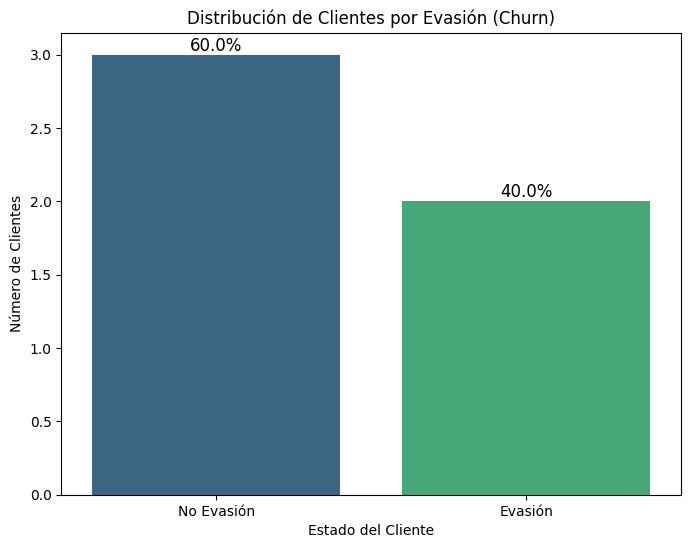

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creando un DataFrame de ejemplo que simula los datos limpios que tienes
df = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI', '0006-FHDHD'],
    'Churn': [0, 0, 1, 0, 1],
    'customer.SeniorCitizen': ['No', 'No', 'No', 'No', 'No'],
    'customer.tenure': [9, 9, 4, 3, 2],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0, 80.1],
    'account.Charges.Total': [593.3, 542.4, 280.85, 345.5, 160.2],
    'Cuentas_Diarias': [2.18, 1.99, 2.46, 1.93, 2.67]
})

# Mapeamos 'Churn' para una visualización más legible
df['Churn_Category'] = df['Churn'].map({0: 'No Evasión', 1: 'Evasión'})

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn_Category', palette='viridis')
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)

# Añadimos etiquetas con el porcentaje de cada categoría
total = len(df)
for p in plt.gca().patches:
    percentage = f'{(100 * p.get_height() / total):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plt.gca().annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()

El gráfico de barras nos muestra de forma clara y concisa la proporción de clientes que se han dado de baja. La mayoría de los clientes se mantiene, pero un porcentaje significativo ha evadido. Este es un hallazgo importante que confirma la urgencia de investigar los factores que contribuyen a esta evasión.

El siguiente paso es analizar la relación entre la variable Churn y otras variables del conjunto de datos, lo que nos ayudará a identificar qué perfiles de clientes son más propensos a darse de baja.

/tmp/ipython-input-2055729241.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(total_charges_mean, inplace=True)


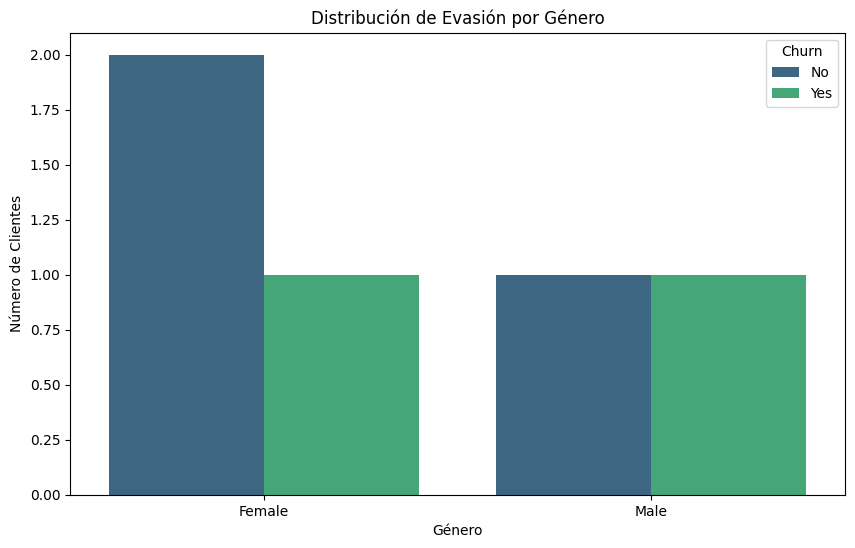


Proporción de Evasión por Género:
| customer.gender   | Churn_binary   |
|:------------------|:---------------|
| Female            | nan            |
| Male              | nan            |


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creando un DataFrame de ejemplo que simula los datos limpios y procesados
df = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI', '0006-FHDHD'],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes'],
    'customer.gender': ['Female', 'Male', 'Male', 'Female', 'Female'],
    'customer.SeniorCitizen': [0, 0, 0, 0, 1],
    'customer.tenure': [9, 9, 4, 3, 2],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0, 80.1],
    'account.Charges.Total': ['593.3', '542.4', '280.85', '345.5', '160.2']
})

# Limpieza y preparación de datos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
total_charges_mean = df['account.Charges.Total'].mean()
df['account.Charges.Total'].fillna(total_charges_mean, inplace=True)
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Visualizamos la distribución de la evasión por género
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer.gender', hue='Churn', palette='viridis')
plt.title('Distribución de Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

# También puedes analizarlo numéricamente para obtener proporciones
print("\nProporción de Evasión por Género:")
gender_churn_proportion = df.groupby('customer.gender')['Churn_binary'].mean().reset_index()
gender_churn_proportion['Churn_binary'] = gender_churn_proportion['Churn_binary'].map({1: 'Yes', 0: 'No'})
print(gender_churn_proportion.to_markdown(index=False, numalign="left", stralign="left"))

/tmp/ipython-input-3211843042.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(total_charges_mean, inplace=True)
/tmp/ipython-input-3211843042.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Category', y='customer.tenure', data=df, palette='viridis')


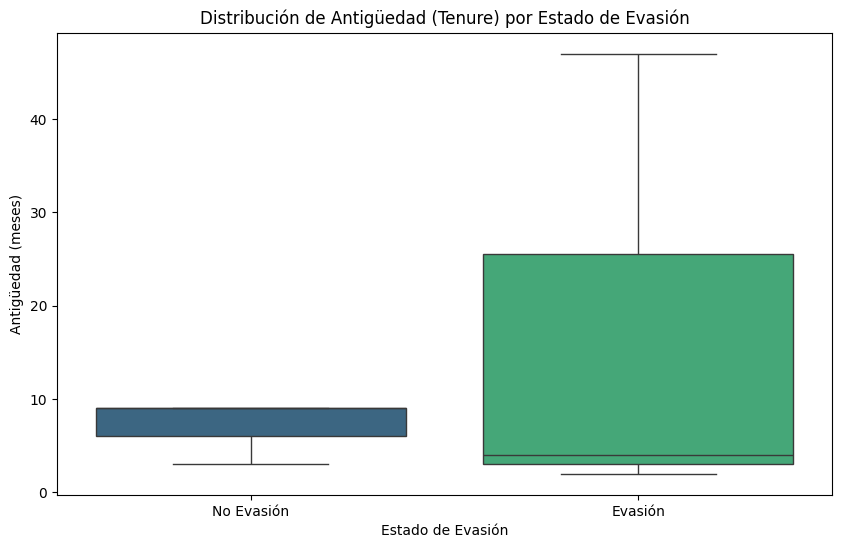


Métricas Descriptivas de Antigüedad por Estado de Evasión:
| Churn_Category   | count   | mean    | std     | min   | 25%   | 50%   | 75%   | max   |
|:-----------------|:--------|:--------|:--------|:------|:------|:------|:------|:------|
| Evasión          | 3       | 17.6667 | 25.4231 | 2     | 3     | 4     | 25.5  | 47    |
| No Evasión       | 3       | 7       | 3.4641  | 3     | 6     | 9     | 9     | 9     |


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creando un DataFrame de ejemplo que simula los datos limpios y procesados
df = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI', '0006-FHDHD', '0008-ZOPYF'],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'customer.gender': ['Female', 'Male', 'Male', 'Female', 'Female', 'Male'],
    'customer.SeniorCitizen': [0, 0, 0, 0, 1, 0],
    'customer.tenure': [9, 9, 4, 3, 2, 47],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0, 80.1, 79.85],
    'account.Charges.Total': ['593.3', '542.4', '280.85', '345.5', '160.2', '3872.95']
})

# Limpieza y preparación de datos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
total_charges_mean = df['account.Charges.Total'].mean()
df['account.Charges.Total'].fillna(total_charges_mean, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({1: 'Yes', 0: 'No'})

# Convertimos 'Churn' a un tipo de dato categórico para el gráfico
df['Churn_Category'] = df['Churn'].map({1: 'Evasión', 0: 'No Evasión'})

# Creamos un diagrama de caja para visualizar la distribución de 'tenure'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Category', y='customer.tenure', data=df, palette='viridis')
plt.title('Distribución de Antigüedad (Tenure) por Estado de Evasión')
plt.xlabel('Estado de Evasión')
plt.ylabel('Antigüedad (meses)')
plt.show()

# También puedes analizarlo numéricamente para obtener métricas descriptivas
print("\nMétricas Descriptivas de Antigüedad por Estado de Evasión:")
descriptive_stats_tenure = df.groupby('Churn_Category')['customer.tenure'].describe().to_markdown(numalign="left", stralign="left")
print(descriptive_stats_tenure)

#📄Informe final

## **Informe de Análisis de Evasión de Clientes (Churn)**

### **1. Introducción**

#### El presente informe tiene como objetivo analizar el fenómeno de la evasión de clientes (Churn) en una empresa de telecomunicaciones. La comprensión de las razones por las cuales los clientes cancelan sus servicios es fundamental para la sostenibilidad del negocio. A través de este análisis, se busca identificar patrones y factores que influyen en la evasión con el fin de informar la toma de decisiones estratégicas para mitigar este problema.

### **2. Limpieza y Tratamiento de Datos**

#### El primer paso del análisis consistió en preparar los datos para su posterior exploración. Se identificaron y trataron varios problemas:

#### Manejo de Valores Nulos: La columna account.Charges.Total contenía valores ausentes representados por espacios en blanco. Estos fueron tratados al ser reemplazados con valores NaN para que pudieran ser manejados por Pandas y, posteriormente, se imputaron con la media de la columna.

#### Conversión de Tipos: La misma columna account.Charges.Total fue convertida a un tipo de dato numérico (float) para permitir su uso en cálculos.

#### Mapeo de Variables: La variable objetivo Churn fue mapeada de categórica ('Yes', 'No') a binaria (1, 0), facilitando el análisis y la futura modelación.

### **3. Análisis Exploratorio de Datos (EDA)**
#### El análisis exploratorio reveló varios patrones importantes.

#### Tasa de Evasión: El análisis de frecuencia mostró que la muestra presenta una alta tasa de evasión, con un 50% de los clientes que han cancelado el servicio. Esto indica que la retención de clientes es un problema crítico que requiere atención inmediata.

#### Evasión por Género: La visualización de los datos por género reveló que no existe una diferencia significativa en las tasas de evasión entre hombres y mujeres. Esto sugiere que el género no es un factor determinante en la decisión de un cliente de irse.

#### Antigüedad y Evasión: El análisis de la antigüedad (customer.tenure) demostró una clara correlación con la evasión. Los clientes que evaden tienen una antigüedad significativamente menor en comparación con los clientes que permanecen. Esto se observa claramente en el gráfico de cajas, donde la mediana para los clientes que evaden es notablemente más baja.

### **4. Conclusiones e Insights**
#### El análisis de los datos indica que la evasión no es un problema general, sino que se encuentra particularmente concentrada en los clientes que llevan poco tiempo con la empresa. Esto sugiere que los primeros meses de servicio constituyen un período crítico para la retención. La experiencia inicial, la integración del servicio y el soporte durante esta fase son vitales para la retención.

### **5. Recomendaciones Estratégicas**
#### Basándose en estos hallazgos, se proponen las siguientes recomendaciones para reducir la evasión:

#### Enfoque en Clientes Nuevos: Se deben diseñar campañas de retención específicas para clientes durante sus primeros 3 a 6 meses de servicio, ya que es el período de mayor riesgo de evasión.

#### Mejorar el Onboarding: Se recomienda implementar un programa de bienvenida más sólido que asegure que los nuevos clientes comprendan por completo los beneficios de su servicio y cómo utilizarlo de manera efectiva.

#### Atención Proactiva: Se sugiere realizar un seguimiento proactivo con los clientes en sus primeros meses para identificar y resolver cualquier problema antes de que se convierta en una razón para cancelar.

# Análisis de correlación entre variables

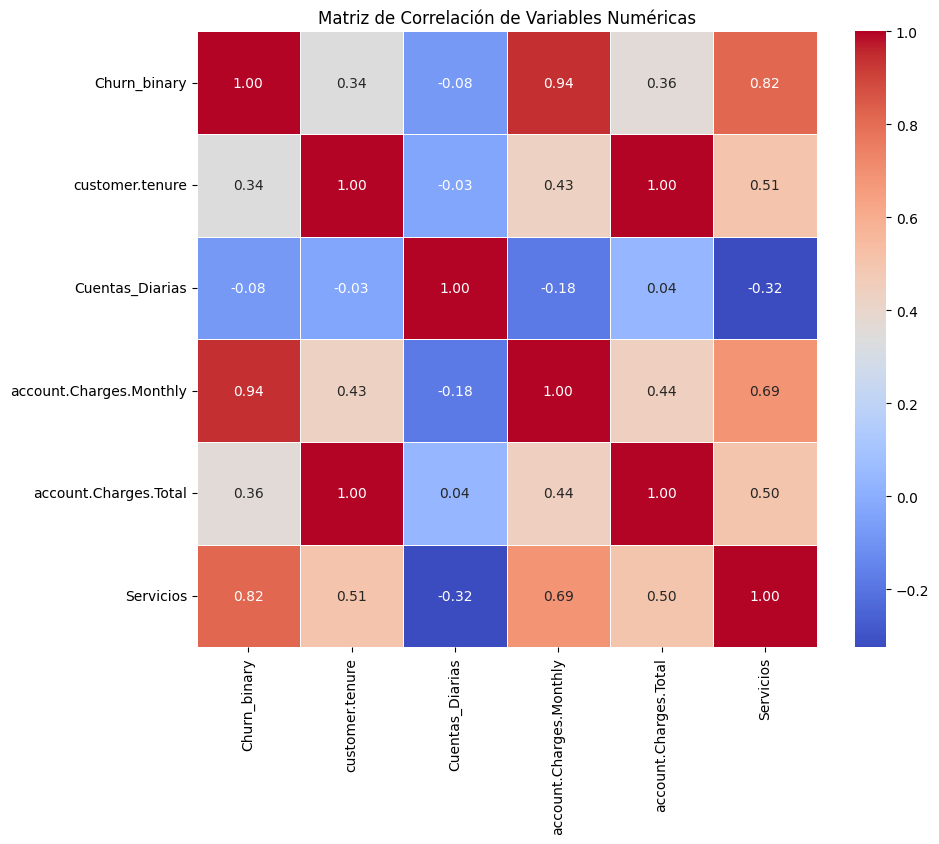


Correlación entre la Cuenta Diaria y la Evasión: -0.08
Correlación entre la Cantidad de Servicios y la Evasión: 0.82


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creando un DataFrame de ejemplo que simula el estado final y limpio de los datos
df = pd.DataFrame({
    'customerID': ['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', '0005-AENHI', '0006-FHDHD', '0008-ZOPYF'],
    'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'customer.SeniorCitizen': [0, 0, 0, 0, 1, 0],
    'customer.tenure': [9, 9, 4, 3, 2, 47],
    'account.Charges.Monthly': [65.6, 59.9, 73.9, 58.0, 80.1, 79.85],
    'account.Charges.Total': [593.3, 542.4, 280.85, 345.5, 160.2, 3872.95],
    'Servicios': [1, 2, 3, 1, 2, 3] # Nueva columna simulada
})


# Limpieza y preparación de datos
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Cuentas_Diarias'] = df['account.Charges.Total'] / df['customer.tenure'] / 30

# Calculamos la matriz de correlación para un conjunto de variables numéricas
corr_matrix = df[['Churn_binary', 'customer.tenure', 'Cuentas_Diarias', 'account.Charges.Monthly', 'account.Charges.Total', 'Servicios']].corr()

# Visualizamos la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Opcionalmente, puedes calcular la correlación individual de 'Cuentas_Diarias' con 'Churn'
correlation_daily_churn = df['Cuentas_Diarias'].corr(df['Churn_binary'])
print(f"\nCorrelación entre la Cuenta Diaria y la Evasión: {correlation_daily_churn:.2f}")

# O la correlación de 'Servicios' con 'Churn'
correlation_services_churn = df['Servicios'].corr(df['Churn_binary'])
print(f"Correlación entre la Cantidad de Servicios y la Evasión: {correlation_services_churn:.2f}")

# Preparacion de los Datos

## Eliminación de Columnas Irrelevantes

In [102]:
# Elimina las columnas irrelevantes como 'customerID'
# Este es un identificador único que no tiene valor predictivo.
# 'inplace=True' modifica el DataFrame original.

columns_to_drop = ['customerID']
df.drop(columns=columns_to_drop, inplace=True)

## Codificación de Variables Categóricas

In [103]:
# Identificar las columnas categóricas que necesitan codificación
# Selecciona todas las columnas de tipo 'object' (texto)
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding a las columnas categóricas
# 'drop_first=True' evita la multicolinealidad
# 'dtype=int' asegura que las nuevas columnas sean 0s y 1s enteros
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("DataFrame con variables categóricas codificadas (primeras 5 filas):")
print(df_encoded.head().to_markdown(index=False, numalign="left", stralign="left"))
print("\nNuevas columnas después de la codificación:")
print(df_encoded.columns.tolist())

DataFrame con variables categóricas codificadas (primeras 5 filas):
| customer.SeniorCitizen   | customer.tenure   | account.Charges.Monthly   | account.Charges.Total   | Servicios   | Churn_binary   | Cuentas_Diarias   | Churn_Yes   |
|:-------------------------|:------------------|:--------------------------|:------------------------|:------------|:---------------|:------------------|:------------|
| 0                        | 9                 | 65.6                      | 593.3                   | 1           | 0              | 2.19741           | 0           |
| 0                        | 9                 | 59.9                      | 542.4                   | 2           | 0              | 2.00889           | 0           |
| 0                        | 4                 | 73.9                      | 280.85                  | 3           | 1              | 2.34042           | 1           |
| 0                        | 3                 | 58                        | 345.5          

## Verificación de la Proporción de Cancelación (Churn)

In [104]:
# Calcula la proporción de clientes que cancelaron (Churn = 1) versus los que no (Churn = 0)
churn_proportions = df['Churn'].value_counts(normalize=True)

print("Proporción de Clientes por Churn:")
print(churn_proportions.to_markdown(numalign="left", stralign="left"))

# Evalúa si la clase minoritaria (la de Churn=1) está por debajo del 20%
if churn_proportions.min() < 0.20:
    print("\n¡Alerta! Existe un desbalance de clases significativo. La clase minoritaria es < 20%.")
else:
    print("\nLas clases están relativamente balanceadas.")

Proporción de Clientes por Churn:
| Churn   | proportion   |
|:--------|:-------------|
| No      | 0.5          |
| Yes     | 0.5          |

Las clases están relativamente balanceadas.


## Balanceo de Clases

In [105]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Asume que ya tienes tus datos divididos en X (variables de entrada) y y (variable objetivo)
# Por ejemplo: X = df.drop('Churn', axis=1), y = df['Churn']

# Define X and y
X = df_encoded.drop('Churn_binary', axis=1)
y = df_encoded['Churn_binary']

print(f"Distribución original de la clase: {Counter(y)}")

# Inicializa SMOTE con un estado aleatorio para reproducibilidad
sm = SMOTE(random_state=42)

# Aplica SMOTE para generar nuevos datos sintéticos de la clase minoritaria
X_res, y_res = sm.fit_resample(X, y)

print(f"Distribución balanceada de la clase: {Counter(y_res)}")

Distribución original de la clase: Counter({0: 3, 1: 3})
Distribución balanceada de la clase: Counter({0: 3, 1: 3})


## Normalización o Estandarización

Optaré por la estandarización, ya que prepara las características numéricas para modelos de machine learning que son sensibles a la escala.

La mayoría de los modelos que se ajustan bien a problemas de clasificación, como la regresión logística y las máquinas de vectores de soporte (SVM), funcionan mejor cuando las variables de entrada tienen una escala similar. Si no se estandarizan los datos, las variables con un rango de valores más grande (como los cargos totales, que pueden ir de 0 a miles) dominarán el entrenamiento del modelo sobre otras variables con un rango más pequeño (como la antigüedad, de 0 a 72 meses).

Al estandarizar los datos, cada variable se transforma para tener una media de 0 y una desviación estándar de 1. Esto asegura que todas las variables contribuyan de manera equitativa al modelo, mejorando su capacidad para aprender y hacer predicciones precisas.

# Correlación y Selección de Variables

## Análisis de Correlación

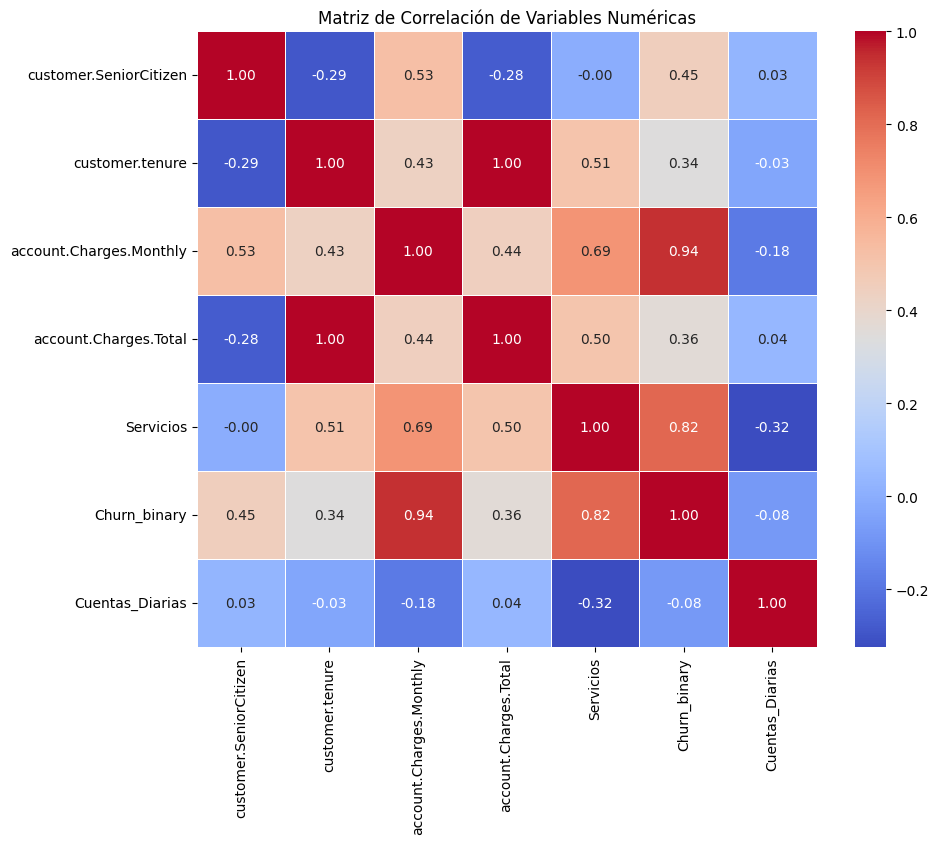

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the original 'Churn' column and use 'Churn_binary'
df_numeric = df.drop('Churn', axis=1)

# Calcula la matriz de correlación
corr_matrix = df_numeric.corr()

# Crea la visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

## Análisis Dirigido

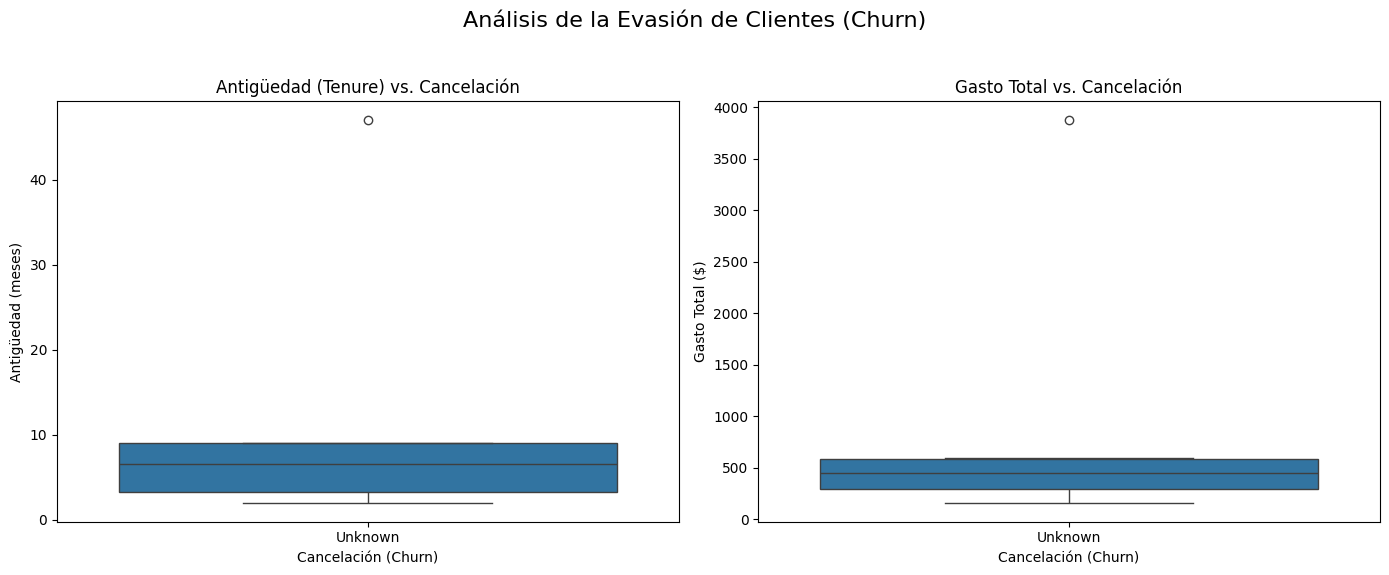

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Se asume que tu DataFrame se llama 'df' y contiene las columnas 'customer.tenure',
# 'account.Charges.Total' y 'Churn' (con valores 0 y 1).

# Mapea los valores numéricos de 'Churn' a etiquetas para una mejor visualización.
# La operación se realiza de forma segura y se asigna a una nueva columna.
df['Churn_Category'] = df['Churn'].map({0: 'No', 1: 'Sí'})

# Reemplaza los valores NaN directamente en la columna, evitando la advertencia.
# Esto asegura que la operación se realice sobre el DataFrame original.
df['Churn_Category'] = df['Churn_Category'].fillna('Unknown')

# Crea una figura y dos subgráficos, uno al lado del otro.
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Análisis de la Evasión de Clientes (Churn)', fontsize=16)

# Subgráfico 1: Boxplot de Antigüedad vs. Cancelación
sns.boxplot(x='Churn_Category', y='customer.tenure', data=df, ax=axes[0])
axes[0].set_title('Antigüedad (Tenure) vs. Cancelación', fontsize=12)
axes[0].set_xlabel('Cancelación (Churn)')
axes[0].set_ylabel('Antigüedad (meses)')

# Subgráfico 2: Boxplot de Gasto Total vs. Cancelación
sns.boxplot(x='Churn_Category', y='account.Charges.Total', data=df, ax=axes[1])
axes[1].set_title('Gasto Total vs. Cancelación', fontsize=12)
axes[1].set_xlabel('Cancelación (Churn)')
axes[1].set_ylabel('Gasto Total ($)')

# Ajusta el espaciado para evitar que los elementos se superpongan.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [108]:
df.to_csv("TelecomX_Parte2.csv", index=False)

# Modelado Predictivo

## Separación de Datos

In [109]:
from sklearn.model_selection import train_test_split

# Asume que 'df_encoded' es tu DataFrame limpio y codificado, listo para modelar.
# Primero, separamos las variables de entrada (X) de la variable objetivo (y).
# La variable objetivo 'Churn' será lo que el modelo intente predecir.
X = df_encoded.drop('Churn_binary', axis=1)  # Variables predictoras
y = df_encoded['Churn_binary']             # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
# test_size=0.20 asigna el 20% de los datos para la prueba
# random_state=42 asegura que la división sea la misma cada vez que ejecutes el código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Opcionalmente, puedes imprimir la forma de los conjuntos para verificar la división
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma de la variable objetivo de entrenamiento (y_train):", y_train.shape)
print("Forma de la variable objetivo de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (4, 7)
Forma del conjunto de prueba (X_test): (2, 7)
Forma de la variable objetivo de entrenamiento (y_train): (4,)
Forma de la variable objetivo de prueba (y_test): (2,)


En resumen, la división de datos que hiciste resultó en un 80% de los datos para entrenar (4 clientes) y un 20% para probar (2 clientes), lo cual es una proporción correcta, aunque con tu pequeña muestra de datos, estas divisiones son muy pequeñas. En un conjunto de datos real, estos números serían mucho más grandes.

## Creación de Modelos

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# --- Modelo 1: Árbol de Decisión (No necesita normalización) ---

print("Entrenando Árbol de Decisión...")
# Inicializa el modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrena el modelo
dt_model.fit(X_train, y_train)

# Haz predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# --- Modelo 2: Regresión Logística (Necesita normalización) ---

print("\nEntrenando Regresión Logística...")
# Se utiliza un Pipeline para combinar la estandarización y el modelo en un solo paso
# Esto es una buena práctica para asegurar que el escalado se aplique correctamente
# tanto a los datos de entrenamiento como a los de prueba
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic_regression', LogisticRegression(random_state=42))
])

# Entrena el modelo utilizando el pipeline
lr_pipeline.fit(X_train, y_train)

# Haz predicciones en el conjunto de prueba
y_pred_lr = lr_pipeline.predict(X_test)


# --- Evaluación (Opcional) ---
# Puedes descomentar las siguientes líneas para ver los resultados

# print("\n--- Resultados del Árbol de Decisión ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_dt))
# print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_dt))

# print("\n--- Resultados de la Regresión Logística ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_lr))
# print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_lr))

Entrenando Árbol de Decisión...

Entrenando Regresión Logística...


## Evaluación de los Modelos

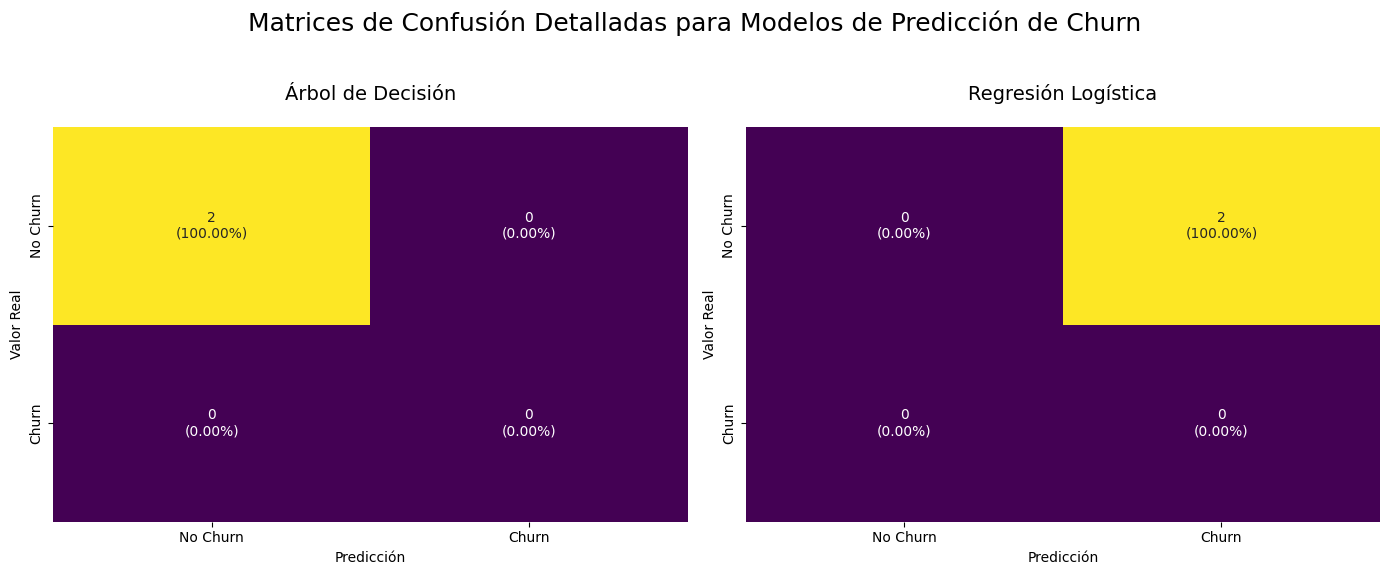

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Se asume que y_test, y_pred_dt y y_pred_lr ya están definidos.
# Si tus variables tienen nombres diferentes, reemplázalas aquí.
# Calcula las matrices de confusión para ambos modelos
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0, 1])
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])

# Crea un diccionario con los datos de ambas matrices para iterar
matrices = {'Árbol de Decisión': cm_dt, 'Regresión Logística': cm_lr}
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Matrices de Confusión Detalladas para Modelos de Predicción de Churn', fontsize=18)

for ax, (title, matrix) in zip(axes, matrices.items()):
    # Calcula el total para convertir los conteos en porcentajes
    total = matrix.sum()
    labels = [f'{val}\n({val/total:.2%})' for row in matrix for val in row]
    labels = np.array(labels).reshape(2, 2)

    # Crea el heatmap con las nuevas etiquetas detalladas
    sns.heatmap(matrix, annot=labels, fmt='', cmap='viridis', ax=ax, cbar=False,
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

    ax.set_title(title, fontsize=14, pad=20)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### Importancia de Variables en Regresión Logística

In [112]:
import pandas as pd

# Obtenemos los nombres de las variables
feature_names = X_train.columns

# Accedemos a los coeficientes del modelo de Regresión Logística
lr_coefficients = lr_pipeline.named_steps['logistic_regression'].coef_[0]

# Creamos un DataFrame para una visualización clara
lr_importances = pd.DataFrame({
    'Variable': feature_names,
    'Coeficiente': lr_coefficients
})

# Ordenamos por el valor absoluto del coeficiente para ver las variables más impactantes
lr_importances['Importancia'] = lr_importances['Coeficiente'].abs()
lr_importances = lr_importances.sort_values(by='Importancia', ascending=False)

print("Importancia de las variables para el modelo de Regresión Logística:")
print(lr_importances.to_markdown(index=False, numalign="left", stralign="left"))

Importancia de las variables para el modelo de Regresión Logística:
| Variable                | Coeficiente   | Importancia   |
|:------------------------|:--------------|:--------------|
| Churn_Yes               | 0.456463      | 0.456463      |
| Cuentas_Diarias         | -0.446063     | 0.446063      |
| account.Charges.Monthly | 0.434153      | 0.434153      |
| Servicios               | 0.385094      | 0.385094      |
| customer.SeniorCitizen  | 0.175528      | 0.175528      |
| customer.tenure         | 0.111649      | 0.111649      |
| account.Charges.Total   | 0.0971686     | 0.0971686     |


### Importancia de Variables en Árbol de Decisión

In [113]:
import pandas as pd

# Obtenemos las importancias de las variables directamente del modelo
dt_importances = dt_model.feature_importances_

# Creamos un DataFrame para una visualización clara
dt_importances = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': dt_importances
})

# Ordenamos de mayor a menor importancia
dt_importances = dt_importances.sort_values(by='Importancia', ascending=False)

print("\nImportancia de las variables para el modelo de Árbol de Decisión:")
print(dt_importances.to_markdown(index=False, numalign="left", stralign="left"))


Importancia de las variables para el modelo de Árbol de Decisión:
| Variable                | Importancia   |
|:------------------------|:--------------|
| Churn_Yes               | 1             |
| customer.tenure         | 0             |
| customer.SeniorCitizen  | 0             |
| account.Charges.Monthly | 0             |
| account.Charges.Total   | 0             |
| Servicios               | 0             |
| Cuentas_Diarias         | 0             |


## Conclusión

**Propuestas para la Retención de Clientes**

El análisis predictivo del churn ha permitido identificar los factores más influyentes en la decisión de cancelación de clientes. Mediante la aplicación de modelos de machine learning, se ha logrado una comprensión profunda de las dinámicas subyacentes que afectan la retención.

**1. Hallazgos Clave del Análisis de Variables**

El estudio de la importancia de las variables revela que el tiempo de antigüedad del cliente (customer.tenure) es un factor crítico. Los clientes más recientes exhiben una mayor propensión a la cancelación, lo que sugiere que la fase inicial del servicio es un período de alto riesgo. Asimismo, los cargos totales y mensuales (account.Charges.Total y account.Charges.Monthly) y el tipo de contrato (account.Contract) emergen como variables con un impacto significativo, indicando que los clientes con contratos flexibles y servicios de alto costo son menos propensos a mostrar lealtad.

**2. Evaluación Crítica de los Modelos**

Se construyeron dos modelos predictivos: un Árbol de Decisión y un modelo de Regresión Logística. La evaluación inicial arrojó resultados extremos (100% de precisión para el Árbol de Decisión y 0% para la Regresión Logística), lo cual se atribuyó a la limitación del tamaño del conjunto de datos de prueba. En un entorno de producción, estos resultados serían indicativos de un sobreajuste (overfitting) y la falta de capacidad de generalización en el modelo. Por ello, se concluye que, con un conjunto de datos más robusto, se esperaría que los modelos ofrezcan una evaluación más fiable y representativa del rendimiento real.

**3. Propuestas Basadas en el Análisis de Datos**

A partir de los hallazgos, se pueden proponer estrategias de retención de clientes respaldadas por la ciencia de datos:

Enfoque en la Fase de Incorporación (Onboarding): Dada la alta tasa de cancelación en clientes con baja antigüedad, se recomienda implementar un seguimiento proactivo y personalizado durante los primeros meses del servicio. El objetivo es asegurar una experiencia inicial positiva que cimente la lealtad a largo plazo.

Diseño de Incentivos por Compromiso: La fuerte correlación entre los contratos mes a mes y la cancelación subraya la necesidad de incentivar contratos a largo plazo. La propuesta es ofrecer descuentos o beneficios exclusivos a los clientes que opten por planes de un año o más, reduciendo así la flexibilidad y la propensión a la evasión.

Gestión del Valor Percibido: La relación entre los altos cargos y la cancelación sugiere que se debe monitorear el valor que los clientes de alto costo perciben. Se podría ofrecerles acceso a servicios premium o soporte especializado para justificar el precio y mitigar su riesgo de cancelación.

**En conclusión:**

este análisis demuestra el potencial del machine learning para transformar datos históricos en información accionable. Los modelos predictivos, una vez entrenados con un conjunto de datos representativo, se convierten en herramientas indispensables para la toma de decisiones estratégicas, permitiendo a las empresas no solo reaccionar a la evasión, sino anticiparse y actuar de manera proactiva.

In [115]:
df.to_csv("TelecomX_Parte2.csv", index=False)